<IPython.core.display.Javascript object>

# Data Pre-processing And Moadalisation

Dans cette partie nous allons continuer notre analyse du Dataset, en faisant un pres-traitement simple et rapid des données. Cette etape est indispensable car elle nous permet d'établir une stratégie de prétraitement des données – autrement appelé Data Preprocessing – à partir de nos données brutes pour arriver à des données exploitables et qui nous donneront un modèle plus performant. 

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [1]:
# Importer des outils dont nous avons besoin pour le Data Pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Lecture et affichage du dataset
full_path_directory = os.path.realpath(os.path.dirname('__file__'))
csv_name = 'data/data_v1.0.csv' 
data = pd.read_csv(os.path.join(full_path_directory, csv_name))
data.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


# PRE-PROCESSING

In [3]:
# Souvent utile de travailler avec un copie de la dataset original
df = data.copy()
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


## Création des sous-ensembles (suite au EDA)

In [4]:
# Jeter un coup d'œil au pourcentage de valeurs non définies 'None'
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Unnamed: 0    0.00000
index         0.00000
date          0.00455
cheveux       0.00515
age           0.00455
exp           0.00480
salaire       0.00475
sexe          0.00500
diplome       0.00550
specialite    0.00465
note          0.00570
dispo         0.00530
embauche      0.00000
dtype: float64

In [5]:
# Extraire seulement les featurs que nous avons estimés importantes dans le notebook "Exploratory_Data_Analysis.ipynb" 
key_columns = df.columns.drop(['Unnamed: 0', 'index', 'date', 'cheveux'])
df = df[key_columns]
df.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


## TrainTest - Nettoyage - Encodage

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 80% de données de train et 20% pour les données de test
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [8]:
trainset['embauche'].value_counts()

0    14152
1     1848
Name: embauche, dtype: int64

In [9]:
testset['embauche'].value_counts()

0    3556
1     444
Name: embauche, dtype: int64

In [10]:
def encodage(df):
    """
    Encoder les colonnes de type Object
    """
    code = {'non':0, 'oui':1,
            'bac':0, 'licence':1,'master':2, 'doctorat':3,
            'geologie':0, 'forage':1, 'detective':2, 'archeologie':3,
            'F':0, 'M':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [11]:
# def feature_engineering(df):
#     df['est malade'] = df[viral_columns].sum(axis=1) >= 1
#     df = df.drop(viral_columns, axis=1)
#     return df


In [12]:
def imputation(df):
    """
    Supprimer toutes les lignes contant au moins une information manquantes 
    """
    # df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    # df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [13]:
def preprocessing(df):
    """
    - (Encodage + imputation) du data Fram
    - Return X, y
    """
    
    df = encodage(df)
    # df = feature_engineering(df)
    df = imputation(df)
    
    y = df['embauche']
    X = df.drop('embauche', axis=1)
    
    print(y.value_counts())
    
    return X, y

In [14]:
X_train, y_train = preprocessing(trainset)

0    13576
1     1772
Name: embauche, dtype: int64


In [15]:
X_test, y_test = preprocessing(testset)

0    3428
1     431
Name: embauche, dtype: int64


In [16]:
trainset.head(), testset.head()

(        age   exp  salaire  sexe  diplome  specialite   note  dispo  embauche
 17815  35.0   4.0  31962.0   1.0      2.0         0.0  67.97    0.0         0
 18370  47.0  11.0  38712.0   1.0      1.0         0.0  59.58    0.0         0
 1379   25.0  12.0  36379.0   0.0      1.0         1.0  66.00    0.0         0
 14763  51.0   9.0  39712.0   1.0      1.0         0.0  55.95    0.0         0
 7346   50.0  11.0  43528.0   0.0      1.0         3.0  63.92    0.0         1,
         age   exp  salaire  sexe  diplome  specialite    note  dispo  embauche
 19134  32.0   7.0  32385.0   1.0      2.0         2.0  103.53    1.0         0
 4981   30.0  10.0  28249.0   0.0      0.0         3.0   63.01    0.0         1
 16643  41.0  10.0  33342.0   1.0      2.0         0.0  110.73    1.0         0
 19117  37.0   9.0  38237.0   0.0      2.0         1.0   78.32    0.0         0
 5306   42.0   6.0  42459.0   1.0      2.0         2.0   64.59    1.0         0)

## Modellisation

In [17]:
# Importer des outils dont nous avons besoin pour la modelisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

Nous allons travailler dans une premier temps avec un classifier `DecisionTreeClassifier`, car c'est un modèle rapide, faciles à comprendre, très utiles pour diagnostiquer un modèle : `variables importantes, etc.`. La construction du modèle ce feras avec les paramètre par défaut du classifier. Ensuite, à partir des résultats obtenus et les hypothèses que nous allons poser, nous pouvant prendre des décision par la suite pour améliorer ce dernier.

In [18]:
model_1 = DecisionTreeClassifier(random_state=0)

## Procédure d'évaluation

Nous avons opter pour la métrique f1_score car elle nous permet d'avoir un bon appercue entre le rapport `precision` et `recall`.  
`precision` et `recall` :  ce sont des métriques qui nous permetent de meusurer les proportion d'erreur de type 1 et 2 dans notre dataset, autrement dit : Les proportion de `faux positifs` et de `faux négatifs` que notre modèle effectue.  
  
La fonction `learning_curve`, nous permet comprendre si notre modèle est en overfitting ou en underfitting, car cette dernière utilise la `cross validation` pour entrainer et évaluer le model sur plusieurs splite de notre dataset. À partir de la, nous pouvons prendre des décisions, exemple `sélection de variables,  crée des polynômes, etc.`

In [19]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [20]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

[[3162  266]
 [ 256  175]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3428
           1       0.40      0.41      0.40       431

    accuracy                           0.86      3859
   macro avg       0.66      0.66      0.66      3859
weighted avg       0.87      0.86      0.87      3859



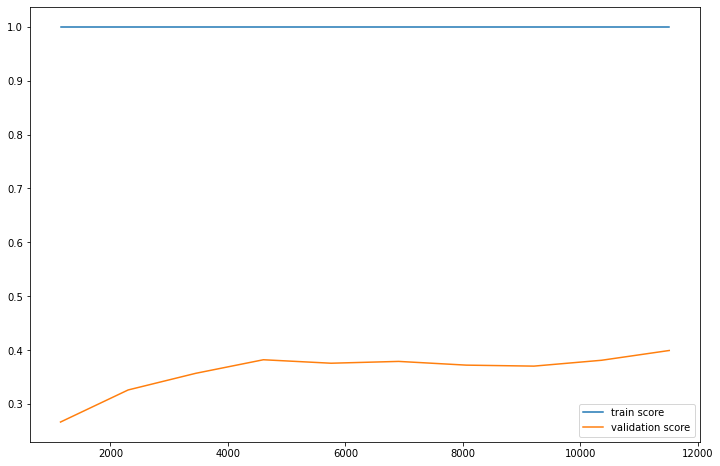

In [21]:
evaluation(model_1)

Identification de 92% des cas qui ne seront pas embaucher ==> Ok   
Identification de 30% des cas qui seront embaucher ===> Pas bon   
  
D'après la courbe d'entrainement et de validation, très clairement notre modèle est en Overfitting. Ce dernier a un score de 100% dans la base de données de train par contre il est incapable de généralise sur des nouveaux cas, soit un score 45% dans le Testset et à partie de 6500 itération in n'arrive plus à s'améliorer. À partir de là plusieurs solutions s'offrent à nous :  
- Modifier notre dataset, `fournir plus de données d'une manière intelligente`.
- Essayer un autre classifier.      
      
Le principe de ce défie est de tester des idées/hypothèses au au fur et à mesure pour améliorer la performance du modèle en utilisant du featurs engineering pour lutter contre cet Overfitting.  

A présent on va explorer la première solution qui consiste à modifier la dataset en utilisant du `feature engineering`, c'est une astuce parmi d'autres qui peut nous permettre de lutter contre l'Overfitting, et cette idée est la `sélection de variables`. À partir de l'entrainement de notre modèle on va utiliser l'l'attribut `feature_importances_` qui nous donne des informations sur les variables les plus importantes dans la découpe des arbre de décision. 


<AxesSubplot: >

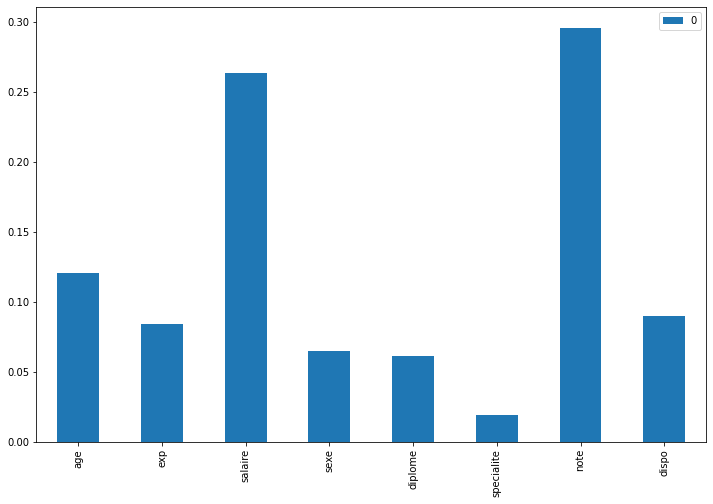

In [22]:
pd.DataFrame(model_1.feature_importances_, index=X_test.columns).plot.bar(figsize=(12, 8))

Nous nous rendons compte que pour notre modèle, ce sont les caractéristiques "âge, salaire, grade et expérience" qui l'intéressent. Très logique NON !  

Ce n'est pas si étonnant car lorsque nous avons fait l'analyse `target/variable` nous avons vu clairement que ces caractéristiques (âge, salaire, note et exp) étaient clairement en différence significative entre les ca (embauche=1 et embauche=0) et nous observons ici que la caractéristique note explose complètement le plafond, le salaire aussi et ensuite dans l'âge et l'expérience et le reste c'est intermédiaire. Donc à partir de ce graphique on peut :     

- Définir le seuil à partir duquel les variables ne sont pas sélectionnées par exemple 0,05.  
- Utiliser un modèle de régularisation ou un modèle qui lutte contre l'Overfitting, le meilleur exemple est le `RandomForestClassifier`. Ensuite, nous allons utiliser le sélecteur `SelectKBest` qui utilise une statistique pour faire cette sélection (exemple `anova`) plus une expansion polynomiale pour créer beaucoup de variables.  

Nous considérons évidemment que les caractéristiques (sexe, diplôme, spécialité, disponibilité) sont très importantes pour le recrutement d'un candidat. Cette fois-ci, nous allons opter pour la deuxième option qui consiste à travailler avec le `RandomForestClassifier`.




In [23]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[3315  113]
 [ 282  149]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3428
           1       0.57      0.35      0.43       431

    accuracy                           0.90      3859
   macro avg       0.75      0.66      0.69      3859
weighted avg       0.88      0.90      0.89      3859



c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn

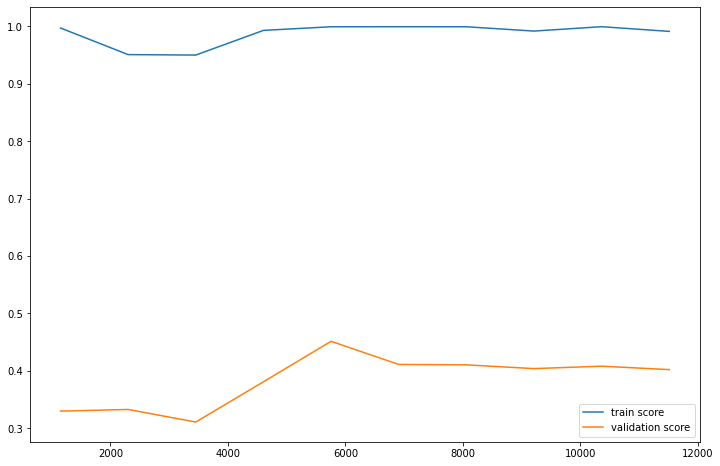

In [24]:
evaluation(model_2)

Petite amélioration dans le `recall`, mais pas aussi intéressant que ca  

Dans ce cas, nous allons procéder comme suit : nous allons entraîner plusieurs modèles différents et nous allons sélectionner celui qui a les meilleures performances, puis nous allons essayer d'améliorer les performances de ce modèle en optimisant ces hyper paramètres à travers une série de plusieurs algorithmes `GridSearshcv`. Enfin, nous explorerons les courbes de `precision` et de `recall` pour trouver le seuil optimal pour notre modèle d'apprentissage automatique.

In [25]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [26]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogisticRegression = make_pipeline(preprocessor, StandardScaler(), LogisticRegression())
Gaussian = make_pipeline(preprocessor, StandardScaler(), GaussianNB())



$Remarque$ :  
SVM et KNN ont besoin de données normalisées, pour avoir de bons résultats. Ce n'est pas le cas pour RandomForest et AdaBoost car ils sont basés sur des arbres de décision.

In [27]:
dict_of_models = {  'RandomForest': RandomForest,
                    'AdaBoost' : AdaBoost,
                    'SVM': SVM,
                    'KNN': KNN,
                    'LogisticRegression':LogisticRegression,
                    'Gaussian':Gaussian    }

RandomForest
[[3315  113]
 [ 282  149]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3428
           1       0.57      0.35      0.43       431

    accuracy                           0.90      3859
   macro avg       0.75      0.66      0.69      3859
weighted avg       0.88      0.90      0.89      3859

AdaBoost
[[3403   25]
 [ 360   71]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      3428
           1       0.74      0.16      0.27       431

    accuracy                           0.90      3859
   macro avg       0.82      0.58      0.61      3859
weighted avg       0.89      0.90      0.87      3859

SVM
[[3411   17]
 [ 349   82]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3428
           1       0.83      0.19      0.31       431

    accuracy                           0.91      3859
   macro avg       0.

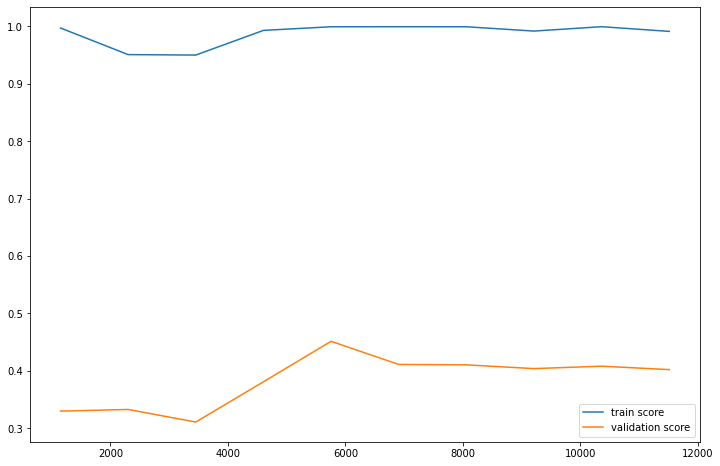

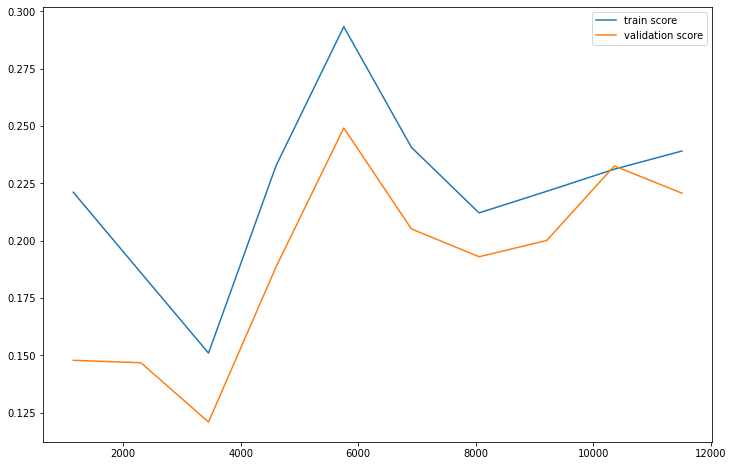

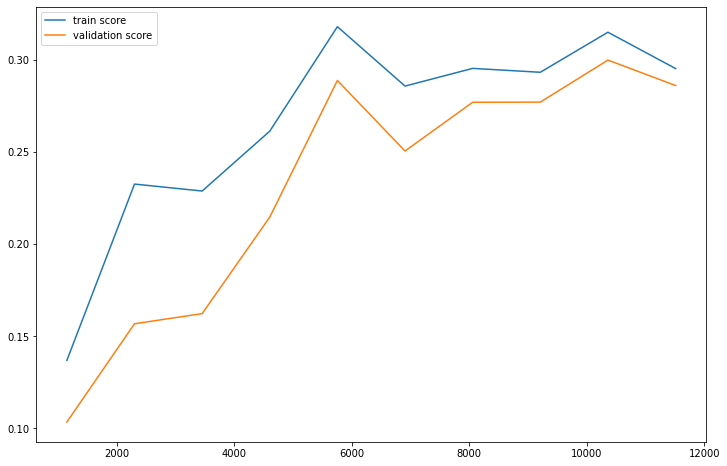

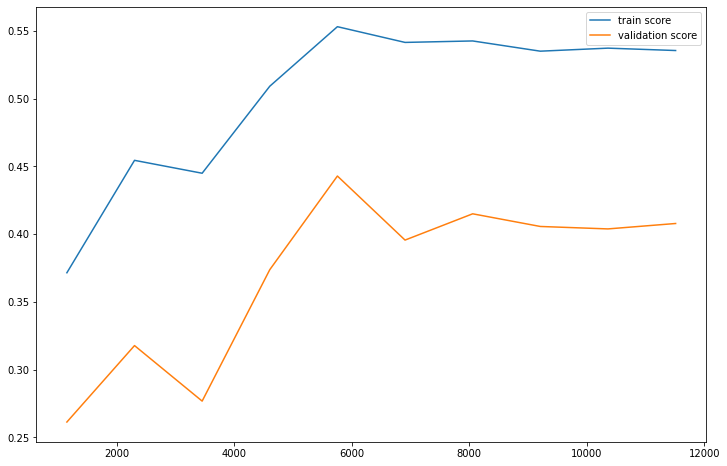

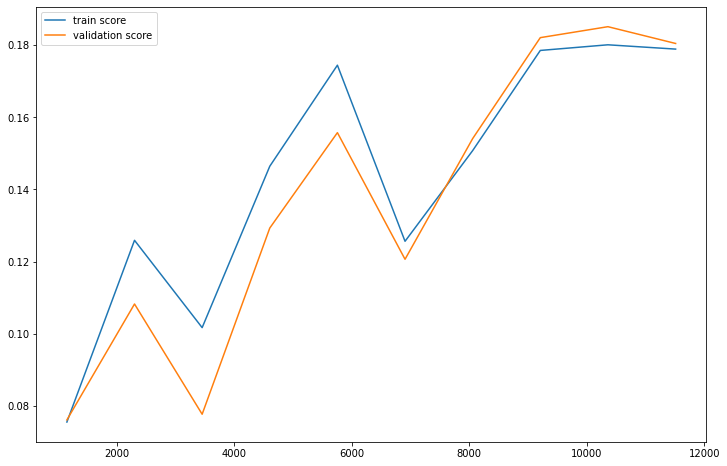

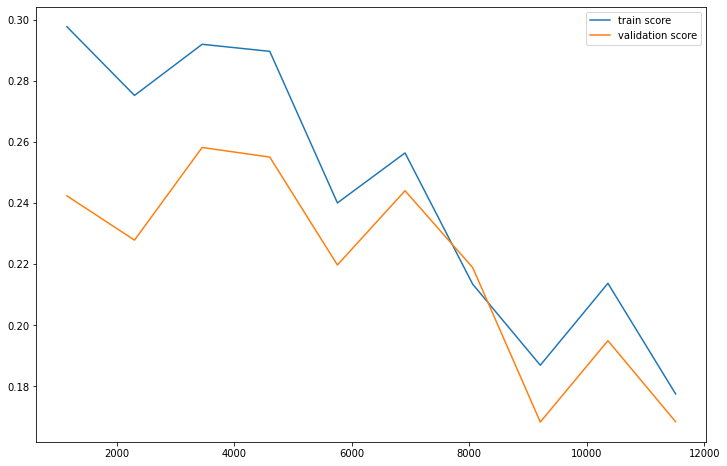

In [28]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

 Le SVM est très intéressant, bien qu'il ne soit pas plus performant que les autres dans ce cas, mais il nous indique qu'il n'est pas surajusté car les scores de formation et de validation sont très proches, il peut donc généraliser ces prédictions.  

 Et pour le KNN, il peut aussi avoir un bon score, mais nous le laisserons de côté pour le moment

### OPTIMISATION

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [32]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3, 4],
               'pipeline__selectkbest__k': range(4, 100)}

In [33]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='accuracy', cv=4,
                         n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_tran

{'svc__gamma': 0.0005, 'svc__C': 1000, 'pipeline__selectkbest__k': 77, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3428
           1       0.83      0.22      0.35       431

    accuracy                           0.91      3859
   macro avg       0.87      0.61      0.65      3859
weighted avg       0.90      0.91      0.88      3859



[[3410   18]
 [ 335   96]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3428
           1       0.84      0.22      0.35       431

    accuracy                           0.91      3859
   macro avg       0.88      0.61      0.65      3859
weighted avg       0.90      0.91      0.88      3859



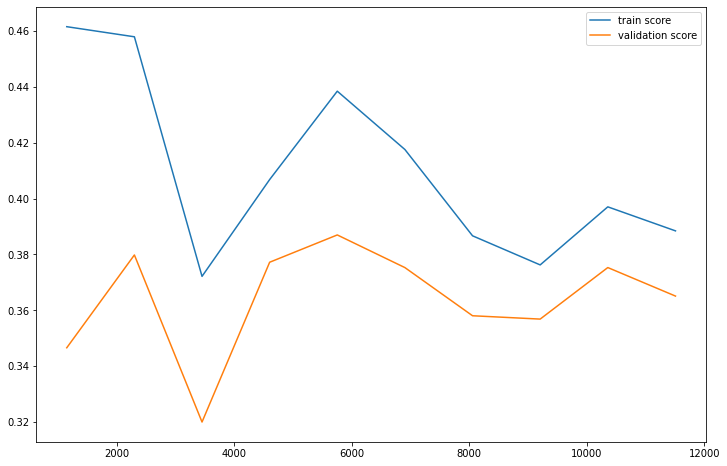

In [41]:
evaluation(grid.best_estimator_)

### Precision Recall Curve


In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

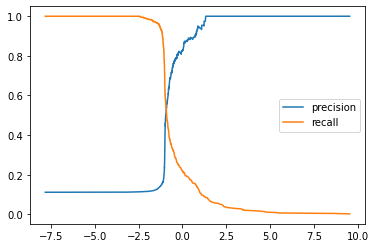

In [36]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [37]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold


In [38]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)


In [39]:
from sklearn.metrics import recall_score


In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [40]:
f1_score(y_test, y_pred)


0.4852809991079393

In [41]:
recall_score(y_test, y_pred)


0.6310904872389791

Pour améliorer ce modèle, il est conseillé d'utiliser la technique de feature egeneiering. Cette dernière fait référence au processus de conception de caractéristiques artificielles dans un algorithme. Ces caractéristiques artificielles sont ensuite utilisées par cet algorithme pour améliorer ses performances, ou en d'autres termes, pour obtenir de meilleurs résultats. Les data scientists passent la plupart de leur temps avec des données, et il devient important de rendre les modèles précis.